## Computing Fundamental Transition of CO under different levels of approximation
We will illustrate approximations to the vibrational transition energies, specifically the fundamental ($n=0 \rightarrow n=1$) transition, using the diatomic molecule CO.  

We will use the Morse potential as a model for the "exact" interatomic potential, and we will approximate this potential by different orders of a Taylor expansion: including up to quadratic (which is the harmonic oscillator approximation), cubic, and quartic terms.  The harmonic and Morse potentials are exactly solvable, and the eigenfunctions and eigenvalues of the vibrational Hamiltonian with cubic and quartic potentials can be approximated using perturbation theory.  Therefore, we will
compare the fundamental  transition computed exactly for harmonic and Morse potentials, and approximately at 2nd order of perturbation theory for cubic and quartic potentials to see the impact of various levels of potential truncation and approximation.


Within the Morse model, the vibrational Hamiltonian can be written as
\begin{equation}
\hat{H}_{vib} = -\frac{\hbar^2}{2\mu} \frac{d^2}{dr^2} + V_{Morse}(r), \tag{1}
\end{equation}
where
\begin{equation}
V_{Morse}(r) = D_e \left(1 - e^{-\beta(r-r_{eq})} \right)^2. \tag{2}
\end{equation}

The Morse parameters for ${\rm CO}$ are as follows: $D_e = 11.225 \: {\rm eV}$, $r_{eq} = 1.1283 \: {\rm Ang.}$, $\beta = 2.5944 \: {\rm Ang.}^{-1}$,
and $\mu = 6.8606 \: {\rm amu}$.

The exact energy eigenvalues for Equation (1) can be written as
\begin{equation}
E_n = \hbar \omega \left( \left(n+ \frac{1}{2} \right) - \chi_e \left(n+ \frac{1}{2} \right)^2 \right) \tag{3}
\end{equation}
where
\begin{equation}
\omega = \sqrt{\frac{2D_e \beta^2}{\mu}} \tag{4}
\end{equation}
and
\begin{equation}
\chi_e = \frac{\hbar \omega}{4 D_e}. \tag{5}
\end{equation}

The Morse potential can be approximated by a Taylor expansion as follows:
\begin{equation}
V_T(r) = \sum_{n=0}^{\infty} \frac{ f^{(n)}(r_{eq})}{n!} \left(r-r_{eq} \right)^n, \tag{6}
\end{equation}
where $f^{(n)}(r_{eq})$ is the $n^{th}$-order derivative of the Morse potential evaluated at the equilibrium bondlength, e.g. $f^{(1)}(r_{eq}) = \frac{d}{dr}V_{Morse}(r_{eq}).$

We will define the Harmonic approximation to the potential as
\begin{equation}
V_H(r) =  \frac{ f^{''}(r_{eq})}{2} \left(r-r_{eq} \right)^2 = \frac{1}{2} k \left(r-r_{eq} \right)^2 \tag{7}
\end{equation}
the cubic approximation to the potential as
\begin{equation}
V_C(r) =  V_H(r) + \frac{ f^{'''}(r_{eq})}{6} \left(r-r_{eq} \right)^3 = V_H(r) + \frac{1}{6} g \left(r-r_{eq} \right)^3,   \tag{8}
\end{equation}
and the quartic approximation as
\begin{equation}
V_Q(r) =  V_C(r) + \frac{ f^{''''}(r_{eq})}{24} \left(r-r_{eq} \right)^4 =  V_C(r) + \frac{1}{24}h(r-r_{eq})^4.  \tag{9}
\end{equation}

Because we are using the Morse model as the "exact" interatomic potential in this notebook, we can compute these derivatives at $r_{eq}$ analytically:
\begin{align}
k = 2 D_e \beta^2 \\
g = -6 D_e \beta^3 \tag{10} \\
h = 14 D_e \beta^4.
\end{align}
However, in general we do not have an analytical form for the interatomic potential, so we must rely on numerical derivatives of the potential evaluated at the $r_{eq}$.  In the context of interatomic potentials computed by quantum chemistry methods (e.g. CCSD(T)), one must first identify the equilibrium geometry, and then compute derivatives by taking a number of single point calculations along all displacement coordinates to compute differences among.  We will write the explicit expression for the second derivative using centered finite differences along the one displacement coordinate relevant for our ${\rm CO}$ molecule:
\begin{equation}
k=\frac{V_{Morse}(r_{eq}+\Delta r)-2V_{Morse}(r_{eq})+V_{Morse}(r_{eq}-\Delta r)}{\Delta r^2}+\mathcal O (\Delta r^2) \tag{11}
\end{equation}
where $\Delta r$ represents a small displacement along the coordinate $r$.  Higher-order derivatives can also be computed, but will require larger numbers of displacements and therefore more energy evaluations by your quantum chemistry method.  Expressions for higher-order derivatives along a single coordinate can be found by using this calculator [here](https://web.media.mit.edu/~crtaylor/calculator.html). Note that the number of displacement coordinates $N$ grows linearly with the number of atoms, and that the number of displacements required to form the $n^{{\rm th}}$-order approximation to the potential grows as $N^n$.

### Perturbation Theory
We can compute the exact vibrational transition energies for the Morse oscillator and the Harmonic oscillator using Equation (3), where the Harmonic oscillator transition energies come from Equation (3) with $\chi_e = 0$.  However, the transition energies when the potential is approximated as $V_C(r)$ or $V_Q(r)$ must be approximated.  We will illustrate the use of Perturbation Theory approximate these transition energies.  

Here we will consider the Hamiltonian
\begin{equation}
\hat{H}_{vib} = -\frac{\hbar^2}{2\mu} \frac{d^2}{dr^2} + V_{H}(r) + V'(r) = \hat{H}_0 + V'(r) \tag{12},
\end{equation}
where $\hat{H}_0$ is exactly solved by the Harmonic oscillator energy eigenfunctions and eigenvalues ($\psi^{(0)}_n(r)$, $E^{(0)}_n$), and $V'(r)$ is the perturbation which will take the form of either
$V'(r) = \frac{1}{6}g(r-r_{eq})^3$ or $V'(r) = \frac{1}{6}g(r-r_{eq})^3 + \frac{1}{24}h(r-r_{eq})^4$ in the cubic and quartic approximations, respectively.

We can calculate the energy of state $n$ at 2nd order of perturbation theory as follows:
\begin{equation}
E_n = E_n^{(0)} +  \langle \psi_n^{(0)} | V'(r) | \psi_n^{(0)} \rangle + \sum_{k \neq n} \frac{|\langle \psi_k^{(0)} | V'(r) | \psi_n^{(0)}|^2}{E_n^{(0)}-E_k^{(0)}}. \tag{13}
\end{equation}

Recall that for the zeroth-order functions have the form
\begin{align}
\psi_n^{(0)}(r) &= \sqrt{\frac{1}{2^n n!}} \cdot \left(\frac{\alpha}{\pi} \right)^{1/4} \cdot H_n \left(\sqrt{\alpha} r \right) \cdot {\rm exp}\left(\frac{-\alpha }{2} r^2 \right) \\
\alpha &= \frac{\mu \omega}{\hbar} \\
\omega &= \sqrt{\frac{k}{\mu}}
\end{align}

### Approach
We will compute the fundamental transition ($E_1 - E_0$) using the following approaches:
1. Harmonic approximation: $E_1 - E_0 = \hbar \omega$
2. Exact solution for Morse Hamiltonian: $E_1 - E_0 = \hbar \omega (1 - 2\chi_e)$
3. Evaluation of Eq. (13) for $n=0$ and $n=1$ utilizing the cubic contribution for $V'(r)$
4. Evaluation of Eq. (13) for $n=0$ and $n=1$ utilizing the cubic and quartic contribution for $V'(r)$


### Setting up Morse Oscillator Parameters
The following block will establish the parameters for $\hat{H}_{vib}$ with the Morse potential for the CO molecule.

In [1]:
# library imports for the entire notebook
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from numpy import trapz
from scipy.special import hermite
from math import factorial

# dissociation energy in eV
De_eV = 11.225

# equilibrium bondlength in Angstroms
r_eq_ang = 1.1283

# reduced mass in amu
mu_amu = 6.8606

# potential curvature in inverse angstromgs
beta_inv_ang = 2.5994

### Unit conversion
We will use atomic units for our calculations and convert to spectroscopic units later.  In the following block, we will store different conversion factors as variables for later use.  

In [2]:
# atomic mass units to kg
amu_to_kg = 1.66054e-27

# angstroms to meters
ang_to_m = 1e-10

# electron volts to Jouls
eV_to_J = 1.60218e-19

# electron volts to atomic units of energy (Hartrees)
eV_to_au = 1 / 27.211 #0.0367493

# angstroms to atomic units of length (Bohr radii)
au_to_ang = 0.52917721067121

# atomic mass units to atomic units of mass
amu_to_au = 1822.89

The fllowing block will use the conversion factors above to store the Morse oscillator parameters in atomic units.

In [3]:

# dissociation energy in au
De_au = De_eV * eV_to_au

# reduced mass in SI
mu_au = mu_amu * amu_to_au

# equilibrium bondlength in SI
r_eq_au = r_eq_ang / au_to_ang
print(r_eq_au)
# beta in SI
beta_au = beta_inv_ang * au_to_ang

# hbar in SI
hbar_au = 1

# h in SI
h_SI = np.pi * 2

print(F"De_eV {De_eV}")
print(F"mu_amu {mu_amu}")
print(F"beta_inv_ang {beta_inv_ang}")
print(F"r_eq_ang {r_eq_ang}")


print(F"De_au {De_au}")
print(F"mu_au {mu_au}")
print(F"beta_au {beta_au}")
print(F"r_eq_au {r_eq_au}")


2.132177987349192
De_eV 11.225
mu_amu 6.8606
beta_inv_ang 2.5994
r_eq_ang 1.1283
De_au 0.4125169968027636
mu_au 12506.119134
beta_au 1.3755432414187434
r_eq_au 2.132177987349192


### Evaluating the Morse potential in atomic units
Here we will create an numpy array of bondlength values between $0$ and $2.5 r_{eq}$

(0.0, 1.0)

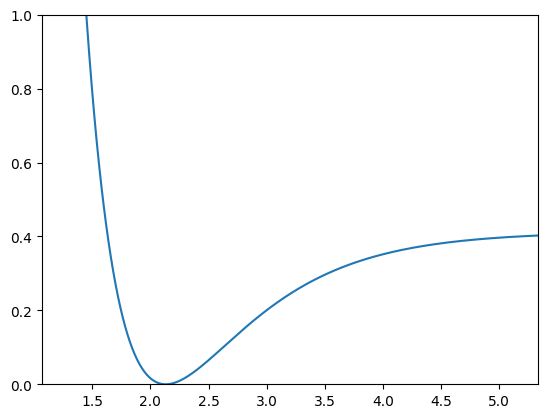

In [4]:
def evaluate_Morse(r, De, beta, r_eq):
    """ Helper function to evaluate the Morse potential at a given value of r

    Arguments
    ---------
    r : float
        value(s) of r to evaluate potential at

    De : float
        dissociation energy of the Morse oscillator

    beta : float
        related to the curvature of the Morse oscillator

    r_eq : float
        equilibrium bondlength of the Morse oscillator

    Returns
    -------
    V_m : float
        value of the Morse potential at value(s) of r

    """
    V_Morse = De*(1-np.exp(-beta*(r-r_eq)))**2
    return V_Morse


# array of bondlength values
r = np.linspace(0.2, 2.5 * r_eq_au, 500)

# array of Morse potential values
V_Morse = evaluate_Morse(r, De_au, beta_au, r_eq_au)

plt.plot(r, V_Morse)
plt.xlim(0.5*r_eq_au,2.5*r_eq_au)
plt.ylim(0,1)

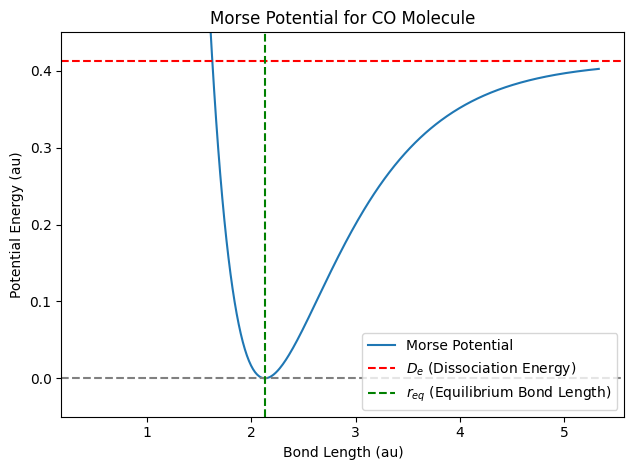

In [5]:
import numpy as np
import matplotlib.pyplot as plt

r_values = np.linspace(0.2 * r_eq_au, 2.5 * r_eq_au, 500)
V_values = evaluate_Morse(r_values, De_au, beta_au, r_eq_au)

plt.plot(r_values, V_values, label="Morse Potential")
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(0.4127, color='red', linestyle='--', label=r"$D_e$ (Dissociation Energy)")
plt.axvline(2.132, color='green', linestyle='--', label=r"$r_{eq}$ (Equilibrium Bond Length)")

plt.xlabel("Bond Length (au)")
plt.ylabel("Potential Energy (au)")
plt.title("Morse Potential for CO Molecule")
plt.tight_layout()
plt.legend()
plt.ylim(-0.05, 0.45)
plt.show()

### Expanding the Morse potential as a Taylor series
In the following block, we will compute the analytical $k$, $g$, and $h$ terms defined in Equation 10.  We will compare the value of $k$ computed analytically to the value computed numerically by Eq. (11), as well.

Recall Equation (10) was:
\begin{align}
k = 2 D_e \beta^2 \\
g = -6 D_e \beta^3  \\
h = 14 D_e \beta^4.
\end{align}

and (11) was:

\begin{equation}
k=\frac{V_{Morse}(r_{eq}+\Delta r)-2V_{Morse}(r_{eq})+V_{Morse}(r_{eq}-\Delta r)}{\Delta r^2}+O (\Delta r^2)
\end{equation}

In [6]:
# Insert analytical evaluation of k
k = 2 * De_au * beta_au **2

# Insert analytical evaluation of g
g = -6 * De_au * beta_au **3

# analytical evalution of h
h = 14 * De_au * beta_au **4

# numerical evaluation of k
# small displacement along r
delta_r = 0.001 * r_eq_au

# value of Morse potential at forward displacement
V_f = evaluate_Morse(r_eq_au + delta_r, De_au, beta_au, r_eq_au)

# value of Morse potential at equilibrium
V_eq = evaluate_Morse(r_eq_au, De_au, beta_au, r_eq_au)

# value of Morse potential at backward displacement
V_b = evaluate_Morse(r_eq_au - delta_r, De_au, beta_au, r_eq_au)

# CFD scheme 2nd order approximation to k
k_num = (V_f - 2 * V_eq + V_b) / (delta_r **2)

# compare the numerical and analytic evaluation of k
print(k_num, k)
if np.isclose(k, k_num):
    print(" The numerical and analytical values for k agree to within +/- 0.0001 atomic units.")


1.5610705004791825 1.561062667389548
 The numerical and analytical values for k agree to within +/- 0.0001 atomic units.


Next we will evaluate the Harmonic, cubic, and quartic models for the interatomic potential and plot all against the Morse potential.

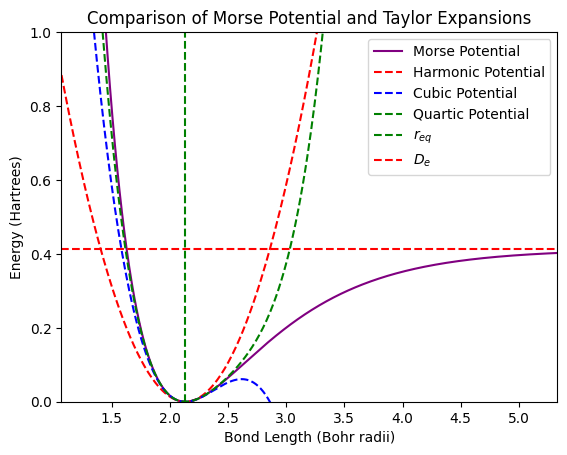

In [7]:
# Harmonic potential
V_H = 1/2 * k * (r -r_eq_au) ** 2

# cubic
V_C = V_H + 1/6 * g * (r - r_eq_au) ** 3

# quartic
V_Q = V_C + 1/24 * h * (r - r_eq_au) ** 4


plt.plot(r, V_Morse, color='purple', label="Morse Potential")
plt.plot(r, V_H, 'r--', label="Harmonic Potential")
plt.plot(r, V_C, 'b--', label="Cubic Potential")
plt.plot(r, V_Q, 'g--', label="Quartic Potential")

# Mark equilibrium bond length (r_eq)
plt.axvline(r_eq_au, color='green', linestyle='--', label=r'$r_{eq}$')

# Mark dissociation energy (D_e)
plt.axhline(De_au, color='red', linestyle='--', label=r'$D_e$')

plt.xlim(0.5 * r_eq_au, 2.5 * r_eq_au)
plt.ylim(0, 1)
plt.xlabel("Bond Length (Bohr radii)")
plt.ylabel("Energy (Hartrees)")
plt.title("Comparison of Morse Potential and Taylor Expansions")
plt.legend()
plt.show()


### Compute $E_1$ and $E_2$ using Perturbation Theory
We will need access to the zeroth-order states $\psi_n^{(0)}(r)$ to compute the 1st and 2nd order energy corrections.
The following helper functions will give us access to these states and will also perform the operations necessary to compute the perturbative corrections.

In [8]:
# Conversion factor from Hartree to cm^-1
hartree_to_cm = 219474.63

# Compute omega and chi_e using the Morse parameters
omega = np.sqrt(2 * De_au * beta_au**2 / mu_au)
chi_e = (omega) / (4 * De_au)

# Define functions to compute energy levels

def E_morse(n):
    """Compute Morse oscillator energy level E_n (in atomic units)"""
    return omega * (n + 0.5 - chi_e * (n + 0.5)**2)

def E_harmonic(n):
    """Compute Harmonic oscillator energy level E_n (in atomic units)"""
    return omega * (n + 0.5)

# Compute energy levels for n=0,1,2
E0_morse = E_morse(0)
E1_morse = E_morse(1)
E2_morse = E_morse(2)

E0_harm = E_harmonic(0)
E1_harm = E_harmonic(1)
E2_harm = E_harmonic(2)

# Calculate transition energies (in atomic units)

# Fundamental transition: n=0 -> n=1
fund_morse = E1_morse - E0_morse
fund_harm = E1_harm - E0_harm

# First overtone: n=0 -> n=2
overtone_morse = E2_morse - E0_morse
overtone_harm = E2_harm - E0_harm

# First hot band: n=1 -> n=2
hotband_morse = E2_morse - E1_morse
hotband_harm = E2_harm - E1_harm

# Convert transition energies to cm^-1
fund_morse_cm = fund_morse * hartree_to_cm
fund_harm_cm = fund_harm * hartree_to_cm

overtone_morse_cm = overtone_morse * hartree_to_cm
overtone_harm_cm = overtone_harm * hartree_to_cm

hotband_morse_cm = hotband_morse * hartree_to_cm
hotband_harm_cm = hotband_harm * hartree_to_cm

# Print the results
print(f"Transition Energies (cm^-1):")
print(f"{'Transition':<20}{'Morse':>12}{'Harmonic':>12}")
print(f"Fundamental (0->1): {fund_morse_cm:12.2f}{fund_harm_cm:12.2f}")
print(f"First overtone (0->2): {overtone_morse_cm:12.2f}{overtone_harm_cm:12.2f}")
print(f"First hot band (1->2): {hotband_morse_cm:12.2f}{hotband_harm_cm:12.2f}")


Transition Energies (cm^-1):
Transition                 Morse    Harmonic
Fundamental (0->1):      2418.87     2452.07
First overtone (0->2):      4804.53     4904.14
First hot band (1->2):      2385.66     2452.07


In [9]:
def compute_alpha(k, mu, hbar):
    """ Helper function to compute \alpha = \sqrt{mu * \omega / \hbar}

    Arguments
    ---------
    k : float
        the Harmonic force constant

    mu : float
        the reduced mass

    hbar : float
        reduced planck's constant

    Returns
    -------
    alpha : float
        \alpha = \sqrt{k * \omega / \hbar}

    """
    # compute omega
    omega = np.sqrt(k/mu)

    # compute alpha
    alpha = mu * omega / hbar

    # return alpha
    return alpha

def N(n, alpha):
    """ Helper function to take the quantum number n of the Harmonic Oscillator and return the normalization constant

    Arguments
    ---------
    n : int
        the quantum state of the harmonic oscillator

    Returns
    -------
    N_n : float
        the normalization constant
    """

    return  np.sqrt( 1 / (2 ** n * factorial(n)) ) * ( alpha / np.pi ) ** (1/4)

def psi(n, alpha, r, r_eq):
    """ Helper function to evaluate the Harmonic Oscillator energy eigenfunction for state n

    Arguments
    ---------
    n : int
        the quantum state of the harmonic oscillator

    alpha : float
        alpha value


    r : float
        position at which psi_n will be evaluated

    r_eq : float
        equilibrium bondlength

    Returns
    -------
    psi_n : float
        value of the harmonic oscillator energy eigenfunction

    """

    Hr = hermite(n)

    psi_n = N(n, alpha) * Hr( np.sqrt(alpha) * ( r - r_eq )) * np.exp( -0.5 * alpha  * (r - r_eq)**2)

    return psi_n

def harmonic_eigenvalue(n, k, mu, hbar):
    """ Helper function to evaluate the energy eigenvalue of the harmonic oscillator for state n"""

    return hbar * np.sqrt(k/mu) * (n + 1/2)

def morse_eigenvalue(n, k, mu, De, hbar):
    """ Helper function to evaluate the energy eigenvalue of the Morse oscillator for state n"""

    omega = np.sqrt( k / mu )
    xi = hbar * omega / (4 * De)

    return hbar * omega * ( (n + 1/2) - xi * (n + 1/2) ** 2)

def potential_matrix_element(n, m, alpha, r, r_eq, V_p):
    """ Helper function to compute <n|V_p|m> where V_p is the perturbing potential

    Arguments
    ---------
    n : int
        quantum number of the bra state

    m : int
        quantum number of the ket state

    alpha : float
        alpha constant for bra/ket states

    r : float
        position grid for bra/ket states

    r_eq : float
        equilibrium bondlength for bra/ket states

    V_p : float
        potential array

    Returns
    -------
    V_nm : float
        <n | V_p | m >

    """
    # bra
    psi_n = psi(n, alpha, r, r_eq)

    # ket
    psi_m = psi(m, alpha, r, r_eq)

    # integrand
    integrand = np.conj(psi_n) * V_p * psi_m

    # integrate
    V_nm = np.trapz(integrand, r)

    return V_nm

# Test out the eigenfunctions
Here we will plot $\psi_0^{(0)}$ against the Harmonic potential and will also test to make sure it is properly normalized.

1.0


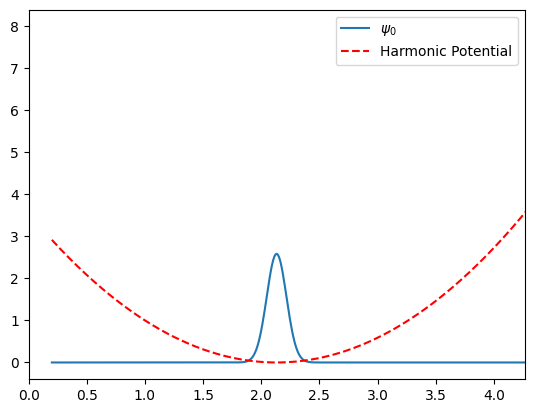

In [10]:
# compute alpha
alpha = compute_alpha(k, mu_au, hbar_au)

# compute psi_0 along the r grid
psi_0 =psi(0, alpha, r, r_eq_au)

# is it normalized?
Integral = trapz(psi_0 ** 2, r)

assert np.isclose(Integral, 1.0)
print(Integral)

# Harmonic potential
plt.plot(r, psi_0, label='$\psi_0$')
plt.plot(r, V_H, 'r--', label="Harmonic Potential")
plt.xlim(0, 2 * r_eq_au)
plt.legend()
plt.show()

# Compute the fundamental transition energies
Now we will compute the fundamental transition energies at all levels of theory and plot the results in both atomic units and in wavenumbers.

In [11]:
# fundamental transition energy at HO level
fundamental_HO = harmonic_eigenvalue(1, k, mu_au, hbar_au) - harmonic_eigenvalue(0, k, mu_au, hbar_au)

# fundamental transition energy at Morse level
fundamental_Morse = morse_eigenvalue(1, k, mu_au, De_au, hbar_au) - morse_eigenvalue(0, k, mu_au, De_au, hbar_au)

# 1st order correction using the cubic potential
pt1_cubic = potential_matrix_element(0, 0, alpha, r, r_eq_au, (V_C - V_H))

# 1st order correction using the quartic potential
pt1_quartic = potential_matrix_element(0, 0, alpha, r, r_eq_au, (V_Q - V_H))

# 2nd order corrections using cubic and quartic potentials
pt2_cubic = 0
pt2_quartic = 0

# sum over |<j|V'|n>|^2/(Ej-En)
for j in range(1, 50):
    E_j = harmonic_eigenvalue(j, k, mu_au, hbar_au)
    Vc_j0 = potential_matrix_element(j, 0, alpha, r, r_eq_au, (V_C - V_H))
    pt2_cubic += Vc_j0 ** 2 / (fundamental_HO - E_j)
    Vq_j0 = potential_matrix_element(j, 0, alpha, r, r_eq_au, (V_Q - V_H))
    pt2_quartic += Vq_j0 ** 2 / (fundamental_HO - E_j)



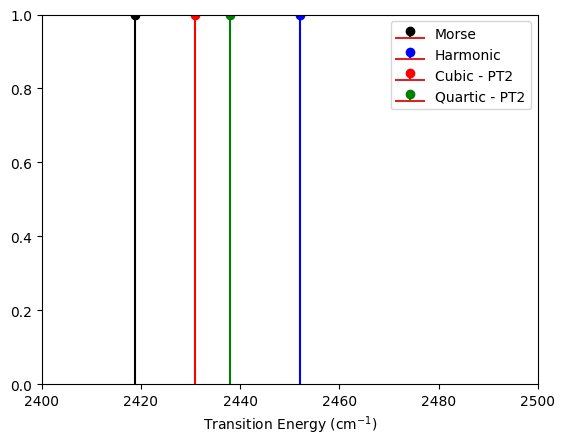

In [12]:
import matplotlib.pyplot as plt

cubic_fo = fundamental_HO + pt1_cubic
quartic_fo = fundamental_HO + pt1_quartic

cubic_so = cubic_fo + pt2_cubic
quartic_so = quartic_fo + pt2_quartic

au_to_wn = 219474.63068

morse_plot = np.array([fundamental_Morse * au_to_wn, 1.0])
HO_plot = np.array([fundamental_HO * au_to_wn, 1.0])
cubic_so_plot = np.array([cubic_so * au_to_wn, 1.0])
quartic_so_plot = np.array([quartic_so * au_to_wn, 1.0])






plt.stem(morse_plot[0], morse_plot[1], "black", label="Morse")
plt.stem(HO_plot[0], HO_plot[1], "blue", label="Harmonic")
plt.stem(cubic_so_plot[0], cubic_so_plot[1], "red", label="Cubic - PT2")
plt.stem(quartic_so_plot[0], quartic_so_plot[1], "green", label="Quartic - PT2")
plt.xlim(2400, 2500)
plt.ylim(0, 1)
plt.xlabel("Transition Energy (cm$^{-1}$)")
plt.legend()
plt.show()


Create and fit Morse potential in atomic units

Now plot the potential and compute some eigenvalues

In [13]:
import psi4
mol_tmpl = """
C
O 1 **R**
symmetry c2v
"""

r_angstrom = np.array([0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1])
options_dict = {
    "basis": "cc-pVTZ",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

psi4.set_options(options_dict)
#mol = psi4.geometry(mol_tmpl)

#ccsdt_e = psi4.energy('ccsd')

ccsdt_energy = []

for r_val in r_angstrom:
    mol_str = mol_tmpl.replace("**R**", str(r_val))
    mol = psi4.geometry(mol_str)
    ccsdt_e = psi4.energy('ccsd')
    ccsdt_energy.append(ccsdt_e)



Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  6, 6, 3
    Auxiliary basis highest AM E, G, H:  7, 7, 4
    Onebody   basis highest AM E, G, H:  -, -, -
    Solid Harmonics ordering:            Gaussian

*** tstart() called on CHEM9QDFT72ALT
*** at Thu Jul 10 15:55:41 2025

   => Loading Basis Set <=

    Name: CC-PVTZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry C          line   186 file /Users/jfoley19/miniconda3/envs/jbook/share/psi4/basis/cc-pvtz.gbs 
    atoms 2 entry O          line   262 file /Users/jfoley19/miniconda3/envs/jbook/share/psi4/basis/cc-pvtz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         --------------------------------------------------------

   @RHF iter   2:  -110.01423240672058   -1.49959e-01   9.80410e-03 DIIS/ADIIS
   @RHF iter   3:  -110.03902288773426   -2.47905e-02   1.22407e-03 DIIS/ADIIS
   @RHF iter   4:  -110.03955643570893   -5.33548e-04   2.28915e-04 DIIS/ADIIS
   @RHF iter   5:  -110.03958809679759   -3.16611e-05   4.82557e-05 DIIS
   @RHF iter   6:  -110.03958983203287   -1.73524e-06   5.08045e-06 DIIS
   @RHF iter   7:  -110.03958985343226   -2.13994e-08   6.91289e-07 DIIS
   @RHF iter   8:  -110.03958985381441   -3.82144e-10   1.04685e-07 DIIS
   @RHF iter   9:  -110.03958985382486   -1.04592e-11   1.36659e-08 DIIS
   @RHF iter  10:  -110.03958985382509   -2.27374e-13   1.31997e-09 DIIS
   @RHF iter  11:  -110.03958985382489    1.98952e-13   1.16833e-10 DIIS
   @RHF iter  12:  -110.03958985382513   -2.41585e-13   1.03612e-11 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                       

   = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    0	    5	    0	    21	    0
	 A2	   6	    0	    0	    0	    6	    0
	 B1	   14	    0	    1	    0	    13	    0
	 B2	   14	    0	    1	    0	    13	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting first half-transformati


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:55:42 2025
Module time:
	user time   =       0.17 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       0.95 seconds =       0.02 minutes
	system time =       0.36 seconds =       0.01 minutes
	total time  =          1 seconds =       0.02 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, an


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:55:43 2025
Module time:
	user time   =       0.15 seconds =       0.00 minutes
	system time =       0.00 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       1.54 seconds =       0.03 minutes
	system time =       0.68 seconds =       0.01 minutes
	total time  =          2 seconds =       0.03 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, an


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:55:44 2025
Module time:
	user time   =       0.15 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       2.12 seconds =       0.04 minutes
	system time =       1.02 seconds =       0.02 minutes
	total time  =          3 seconds =       0.05 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, an


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:55:45 2025
Module time:
	user time   =       0.15 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       2.67 seconds =       0.04 minutes
	system time =       1.35 seconds =       0.02 minutes
	total time  =          4 seconds =       0.07 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, an


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:55:46 2025
Module time:
	user time   =       0.15 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       3.28 seconds =       0.05 minutes
	system time =       1.71 seconds =       0.03 minutes
	total time  =          5 seconds =       0.08 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, an


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:55:47 2025
Module time:
	user time   =       0.15 seconds =       0.00 minutes
	system time =       0.00 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       3.93 seconds =       0.07 minutes
	system time =       2.12 seconds =       0.04 minutes
	total time  =          6 seconds =       0.10 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, an

	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       4.58 seconds =       0.08 minutes
	system time =       2.51 seconds =       0.04 minutes
	total time  =          7 seconds =       0.12 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-e


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:55:49 2025
Module time:
	user time   =       0.15 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       5.27 seconds =       0.09 minutes
	system time =       2.93 seconds =       0.05 minutes
	total time  =          8 seconds =       0.13 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, an

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on CHEM9QDFT72ALT
*** at Thu Jul 10 15:55:50 2025


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD
	Number of irreps     = 4
	Number of MOs        = 60
	Number of active MOs = 60
	AO-Basis          

	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =       6.70 seconds =       0.11 minutes
	system time =       3.82 seconds =       0.06 minutes
	total time  =         11 seconds =       0.18 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


*** tst

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on CHEM9QDFT72ALT
*** at Thu Jul 10 15:55:53 2025


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD
	Number of irreps     = 4
	Number of MOs        = 60
	Number of active MOs = 60
	AO-Basis          


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:55:54 2025
Module time:
	user time   =       0.17 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       8.24 seconds =       0.14 minutes
	system time =       4.83 seconds =       0.08 minutes
	total time  =         13 seconds =       0.22 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, an

	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       9.00 seconds =       0.15 minutes
	system time =       5.33 seconds =       0.09 minutes
	total time  =         14 seconds =       0.23 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-e

	system time =       0.02 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       9.89 seconds =       0.16 minutes
	system time =       5.94 seconds =       0.10 minutes
	total time  =         16 seconds =       0.27 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-e


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:55:59 2025
Module time:
	user time   =       0.18 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =      10.83 seconds =       0.18 minutes
	system time =       6.56 seconds =       0.11 minutes
	total time  =         18 seconds =       0.30 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, an

0000000

	Size of irrep 0 of <ab|cd> integrals:      0.664 (MW) /      5.314 (MB)
	Size of irrep 1 of <ab|cd> integrals:      0.348 (MW) /      2.785 (MB)
	Size of irrep 2 of <ab|cd> integrals:      0.493 (MW) /      3.942 (MB)
	Size of irrep 3 of <ab|cd> integrals:      0.493 (MW) /      3.942 (MB)
	Total:                                     1.998 (MW) /     15.983 (MB)

	Size of irrep 0 of <ia|bc> integrals:      0.107 (MW) /      0.854 (MB)
	Size of irrep 1 of <ia|bc> integrals:      0.033 (MW) /      0.264 (MB)
	Size of irrep 2 of <ia|bc> integrals:      0.065 (MW) /      0.517 (MB)
	Size of irrep 3 of <ia|bc> integrals:      0.065 (MW) /      0.517 (MB)
	Total:                                     0.269 (MW) /      2.152 (MB)

	Size of irrep 0 of tijab amplitudes:       0.022 (MW) /      0.176 (MB)
	Size of irrep 1 of tijab amplitudes:       0.001 (MW) /      0.009 (MB)
	Size of irrep 2 of tijab amplitudes:       0.007 (MW) /      0.056 (MB)
	Size of irrep 3 of tijab amplitudes:   

In [14]:
V_min_ccsdt = np.min(ccsdt_energy)
print(V_min_ccsdt)

-113.16159974406064


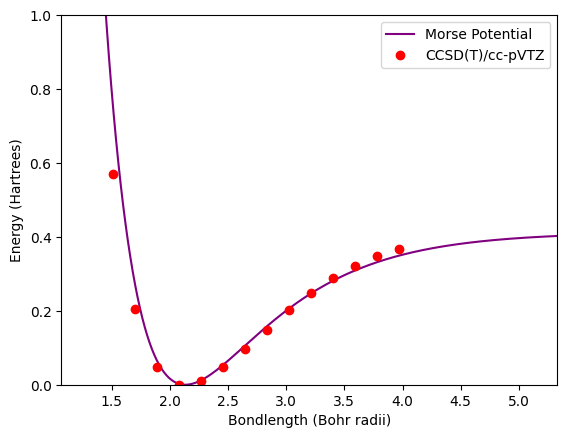

In [15]:
plt.plot(r, V_Morse, 'purple', label="Morse Potential")
plt.plot(r_angstrom / au_to_ang, ccsdt_energy-V_min_ccsdt, 'ro', label="CCSD(T)/cc-pVTZ")
#plt.plot(r, V_H, 'r--', label="Harmonic Potential")
#plt.plot(r, V_C, 'b--', label="Cubic Potential")
#plt.plot(r, V_Q, 'g--', label="Quartic Potential")
plt.xlim(0.5 * r_eq_au, 2.5 * r_eq_au)
plt.ylim(0, 1)
plt.xlabel("Bondlength (Bohr radii)")
plt.ylabel("Energy (Hartrees)")
plt.legend()
plt.show()

# Assignment
1. Locate the equilibrium bondlength at the CCSD/cc-pVTZ level and report it in Angstroms and Bohr units.  Report the error and percentage error compared to the $R_{eq}$ used in the Morse potential.

2. Utilize second-order schemes for [finite differences](https://www.mech.kth.se/~ardeshir/courses/literature/fd.pdf) to approximate $k$, $g$, and $h$ at the CCSD/cc-pVTZ level and report these in atomic units.  **Hint** Make sure your displacements are in atomic units!  Report the error and percentage error compared to these values that were derived from the Morse potential.

3. Build a quartic potential model for CO using coefficients $k$, $g$, and $h$ derived from the previous step.  Plot the Harmonic, Cubic, Quartic components along with the raw CCSD/cc-pVTZ data and the original Morse potential.

4. Compute the fundamental transition energy from CO using the quartic potential and 2nd-order perturbation theory.  Make a table that includes the fundamental computed using this approximation, the fundamental from the Morse model, and the experimental value for the CO fundamental.  Include a column for the percentage error of both approximations relative to the experimental value.

In [16]:
#1 To find the equilibrium bondlength, we could use a np.linspace function to isolate terms and find more points closer to min
import numpy as np
r_1 = 1.7
r_3 = 2.45
r_fine_ang = (np.linspace(r_1,r_3,10)) * au_to_ang
print(r_fine_ang)

mol_tmpl = """
C
O 1 **R**
symmetry c2v
"""

#r_angstrom = np.array([0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1])
options_dict = {
    "basis": "cc-pVTZ",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

psi4.set_options(options_dict)
ccsdt_energy = []

for r_val in r_fine_ang:
    mol_str = mol_tmpl.replace("**R**", str(r_val))
    mol = psi4.geometry(mol_str)
    ccsdt_e = psi4.energy('ccsd')
    ccsdt_energy.append(ccsdt_e)

[0.89960126 0.94369936 0.98779746 1.03189556 1.07599366 1.12009176
 1.16418986 1.20828796 1.25238607 1.29648417]

Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  6, 6, 3
    Auxiliary basis highest AM E, G, H:  7, 7, 4
    Onebody   basis highest AM E, G, H:  -, -, -
    Solid Harmonics ordering:            Gaussian

*** tstart() called on CHEM9QDFT72ALT
*** at Thu Jul 10 15:56:00 2025

   => Loading Basis Set <=

    Name: CC-PVTZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry C          line   186 file /Users/jfoley19/miniconda3/envs/jbook/share/psi4/basis/cc-pvtz.gbs 
    atoms 2 entry O          line   262 file /Users/jfoley19/miniconda3/envs/jbook/share/psi4/basis/cc-pvtz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
   

                       

       2B2     0.218878     2B1     0.218878     6A1     0.282015  
       7A1     0.442039     3B2     0.474716     3B1     0.474716  
       8A1     0.715730     4B1     0.796822     4B2     0.796822  
       9A1     0.823622     1A2     0.823622    10A1     1.006411  
       5B1     1.182187     5B2     1.182187    11A1     1.452510  
       2A2     1.836327    12A1     1.836327    13A1     2.023599  
       6B1     2.087503     6B2     2.087503    14A1     2.251133  
       7B1     2.438958     7B2     2.438958     8B2     2.933815  
       8B1     2.933815    15A1     3.052905    16A1     3.241097  
       3A2     3.241097     4A2     3.341144    17A1     3.341144  
       9B2     3.351421     9B1     3.351421    18A1     3.445507  
      10B2     3.979634    10B1     3.979634    19A1     4.214987  
      11B2     4.673218    11B1     4.673218    12B2     5.569130  
      12B1     5.569130    20A1     5.781621    21A1     6.358375  
       5A2     6.358375

     6A2     6.769039    22A1     6.769039  
      23A1     6.798317    13B2     7.036904    13B1     7.036904  
      24A1     7.531473    14B2     7.561018    14B1     7.561018  
      25A1     9.296094    26A1    16.194318  

    Final Occupation by Irrep:
             A1    A2    B1    B2 
    DOCC [     5,    0,    1,    1 ]
    NA   [     5,    0,    1,    1 ]
    NB   [     5,    0,    1,    1 ]

  @RHF Final Energy:  -112.59411427043187

   => Energetics <=

    Nuclear Repulsion Energy =             28.2352941175824981
    One-Electron Energy =                -208.7579636379382464
    Two-Electron Energy =                  67.9285552499238747
    Total Energy =                       -112.5941142704318736

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole       


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:56:00 2025
Module time:
	user time   =       0.50 seconds =       0.01 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      12.13 seconds =       0.20 minutes
	system time =       7.12 seconds =       0.12 minutes
	total time  =         19 seconds =       0.32 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, an

       CCENERGY        *
            *                        *
            **************************

    Nuclear Rep. energy (wfn)     =   28.235294117582498
    SCF energy          (wfn)     = -112.594114270431874
    Reference energy    (file100) = -112.594114270431874

    Input parameters:
    -----------------
    Wave function   =     CCSD
    Reference wfn   =     RHF
    Brueckner       =     No
    Memory (Mbytes) =     524.3
    Maxiter         =     50
    R_Convergence   =     1.0e-07
    E_Convergence   =     1.0e-10
    Restart         =     Yes
    DIIS            =     Yes
    AO Basis        =     NONE
    ABCD            =     NEW
    Cache Level     =     2
    Cache Type      =     LOW
    Print Level     =     1
    Num. of threads =     1
    # Amps to Print =     10
    Print MP2 Amps? =     No
    Analyze T2 Amps =     No
    Print Pair Ener =     No
    Local CC        =     No
    SCS-MP2         =     False
    SCSN-MP2        =     False
    SCS-CCSD     

.971e-03    0.007745    0.017643    0.017643    0.146761
     7        -0.360530118536327    4.269e-04    0.007816    0.017774    0.017774    0.146853
     8        -0.360534511807811    1.048e-04    0.007837    0.017822    0.017822    0.146862
     9        -0.360535904949183    2.333e-05    0.007841    0.017831    0.017831    0.146858
    10        -0.360535706420522    5.231e-06    0.007841    0.017832    0.017832    0.146856
    11        -0.360535700478934    1.360e-06    0.007842    0.017833    0.017833    0.146856
    12        -0.360535689723963    3.400e-07    0.007842    0.017833    0.017833    0.146856
    13        -0.360535688342500    7.293e-08    0.007842    0.017833    0.017833    0.146856
    14        -0.360535688896874    1.691e-08    0.007842    0.017833    0.017833    0.146856
    15        -0.360535689032877    4.709e-09    0.007842    0.017833    0.017833    0.146856
    16        -0.360535689056368    1.232e-09    0.007842    0.017833    0.017833    0.146856
   


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:56:01 2025
Module time:
	user time   =       0.15 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      12.88 seconds =       0.21 minutes
	system time =       7.51 seconds =       0.13 minutes
	total time  =         20 seconds =       0.33 minutes


 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on CHEM9QDFT72ALT
*** at Thu Jul 10 15:56:01 2025


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD
	Number of irreps     = 4
	Number of MOs        = 60
	Number of active MOs = 60
	AO-Basis          


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:56:02 2025
Module time:
	user time   =       0.15 seconds =       0.00 minutes


	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      13.50 seconds =       0.23 minutes
	system time =       7.90 seconds =       0.13 minutes
	total time  =         21 seconds =       0.35 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-e


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:56:03 2025
Module time:
	user time   =       0.15 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      14.11 seconds =       0.24 minutes
	system time =       8.28 seconds =       0.14 minutes
	total time  =         22 seconds =       0.37 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, an

art() called on CHEM9QDFT72ALT
*** at Thu Jul 10 15:56:03 2025


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD
	Number of irreps     = 4
	Number of MOs        = 60
	Number of active MOs = 60
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    0	    5	    0	    21	    0
	 A2	   6	    0	    0	    0	    6	    0
	 B1	   14	    0	    1	    0	    13	    0
	 B2	   14	    0	    1	    0	    13	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV).


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:56:04 2025
Module time:
	user time   =       0.15 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      14.65 seconds =       0.24 minutes


	system time =       8.59 seconds =       0.14 minutes
	total time  =         23 seconds =       0.38 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on CHEM9QDFT72ALT
*** at Thu Jul 10 15:56:04 2025


	Wfn Parameters:
	--------------------
	Wavefunction     


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:56:05 2025
Module time:
	user time   =       0.16 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      15.27 seconds =       0.25 minutes
	system time =       8.98 seconds =       0.15 minutes
	total time  =         24 seconds =       0.40 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, an

    = CCSD
	Number of irreps     = 4
	Number of MOs        = 60
	Number of active MOs = 60
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    0	    5	    0	    21	    0
	 A2	   6	    0	    0	    0	    6	    0
	 B1	   14	    0	    1	    0	    13	    0
	 B2	   14	    0	    1	    0	    13	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half

	total time  =         25 seconds =       0.42 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on CHEM9QDFT72ALT
*** at Thu Jul 10 15:56:06 2025


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD
	Number of irreps     = 4
	Number of MOs    

    = 60
	Number of active MOs = 60
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    0	    5	    0	    21	    0
	 A2	   6	    0	    0	    0	    6	    0
	 B1	   14	    0	    1	    0	    13	    0
	 B2	   14	    0	    1	    0	    13	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation 

	system time =       9.78 seconds =       0.16 minutes
	total time  =         26 seconds =       0.43 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on CHEM9QDFT72ALT
*** at Thu Jul 10 15:56:07 2025


	Wfn Parameters:
	--------------------
	Wavefunction     

    = CCSD
	Number of irreps     = 4
	Number of MOs        = 60
	Number of active MOs = 60
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    0	    5	    0	    21	    0
	 A2	   6	    0	    0	    0	    6	    0
	 B1	   14	    0	    1	    0	    13	    0
	 B2	   14	    0	    1	    0	    13	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:56:08 2025
Module time:
	user time   =       0.16 seconds =       0.00 minutes
	system time =       0.00 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      17.19 seconds =       0.29 minutes
	system time =      10.18 seconds =       0.17 minutes
	total time  =         27 seconds =       0.45 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, an

lectron integrals.
        Stored in file 33.


*** tstart() called on CHEM9QDFT72ALT
*** at Thu Jul 10 15:56:08 2025


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD
	Number of irreps     = 4
	Number of MOs        = 60
	Number of active MOs = 60
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    0	    5	    0	    21	    0
	 A2	   6	    0	    0	    0	    6	    0
	 B1	   14	    0	    1	    0	    13	    0
	 B2	   14	    0	    1	    0	    13	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	T


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:56:09 2025
Module time:
	user time   =       0.16 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      17.87 seconds =       0.30 minutes
	system time =      10.62 seconds =       0.18 minutes
	total time  =         28 seconds =       0.47 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, an

art() called on CHEM9QDFT72ALT
*** at Thu Jul 10 15:56:09 2025


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD
	Number of irreps     = 4
	Number of MOs        = 60
	Number of active MOs = 60
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    0	    5	    0	    21	    0
	 A2	   6	    0	    0	    0	    6	    0
	 B1	   14	    0	    1	    0	    13	    0
	 B2	   14	    0	    1	    0	    13	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV).

    0.056 (MB)
	Size of irrep 3 of tijab amplitudes:       0.007 (MW) /      0.056 (MB)
	Total:                                     0.037 (MW) /      0.298 (MB)

	Nuclear Rep. energy          =     19.59183673464907
	SCF energy                   =   -112.71479068943131
	One-electron energy          =   -192.58990078043266
	Two-electron energy          =     60.28327335635264
	Reference energy             =   -112.71479068943096

*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:56:10 2025
Module time:
	user time   =       0.08 seconds =       0.00 minutes
	system time =       0.10 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =      18.00 seconds =       0.30 minutes
	system time =      10.72 seconds =       0.18 minutes
	total time  =         29 seconds =       0.48 minutes
            **************************
            *                        *
            *        CCENERGY        *
            *                 

In [17]:
V_min_ccsdt_1 = np.min(ccsdt_energy)
print(V_min_ccsdt_1)

-113.16314721195815


In [18]:
A = ccsdt_energy
print(ccsdt_energy)
B = np.argmin(ccsdt_energy)
print(B)
C = r_fine_ang
print(C)
r_eq_ang_1 = r_fine_ang[5]
r_fine_au = r_fine_ang / au_to_ang
print(r_fine_au)
print(r_eq_ang_1)
r_eq_au_1= r_eq_ang_1 / au_to_ang
print(r_eq_au_1)
Error_r_eq_au = (r_eq_au - r_eq_au_1) / r_eq_au
print(Error_r_eq_au)
Percent_Error = Error_r_eq_au * 100
print(Percent_Error)

[-112.95464995952292, -113.04299514578568, -113.10160685135253, -113.1376927541503, -113.15678723427028, -113.16314721195815, -113.16005040271378, -113.1500213785951, -113.13500364944849, -113.11649112634367]
5
[0.89960126 0.94369936 0.98779746 1.03189556 1.07599366 1.12009176
 1.16418986 1.20828796 1.25238607 1.29648417]
[1.7        1.78333333 1.86666667 1.95       2.03333333 2.11666667
 2.2        2.28333333 2.36666667 2.45      ]
1.1200917625873945
2.1166666666666667
0.007274871410622601
0.7274871410622601


In [19]:
#Utilize second-order schemes for finite differences to approximate k,g,h at the CCSD/cc-pVTZ level and report these in atomic units.
#Hint Make sure your displacements are in atomic units! Report the error and percentage error compared to these values that were derived from the Morse potential.

#Insert analytical evaluation of k
k = 2 * De_au * beta_au **2

# Insert analytical evaluation of g
g = -6 * De_au * beta_au **3

# analytical evalution of h
h = 14 * De_au * beta_au **4

# numerical evaluation of k
# small displacement along r
delta_r_1 = 0.001 * r_eq_ang_1

# value of First forward Displacement
V_f1 = r_eq_ang_1 + 2*delta_r_1

# value of forward displacement
V_f = r_eq_ang_1 + delta_r_1

# value at equilibrium
V_eq = r_eq_ang_1

# value of backward displacement
V_b = r_eq_ang_1 - delta_r_1

# value of last backward displacement
V_b1 = r_eq_ang_1 - 2*delta_r_1

import numpy as np
#new_r_eq_ang_array
R =np.array([V_f1, V_f, V_eq, V_b, V_b1])
mol_tmpl = """
C
O 1 **R**
symmetry c2v
"""

#r_angstrom = np.array([0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1])
options_dict = {
    "basis": "cc-pVTZ",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

psi4.set_options(options_dict)
ccsdt_energy = []

for r_val in R:
    mol_str = mol_tmpl.replace("**R**", str(r_val))
    mol = psi4.geometry(mol_str)
    ccsdt_e = psi4.energy('ccsd')
    ccsdt_energy.append(ccsdt_e)


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  6, 6, 3
    Auxiliary basis highest AM E, G, H:  7, 7, 4
    Onebody   basis highest AM E, G, H:  -, -, -
    Solid Harmonics ordering:            Gaussian

*** tstart() called on CHEM9QDFT72ALT
*** at Thu Jul 10 15:56:10 2025

   => Loading Basis Set <=

    Name: CC-PVTZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry C          line   186 file /Users/jfoley19/miniconda3/envs/jbook/share/psi4/basis/cc-pvtz.gbs 
    atoms 2 entry O          line   262 file /Users/jfoley19/miniconda3/envs/jbook/share/psi4/basis/cc-pvtz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         --------------------------------------------------------


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:56:10 2025
Module time:
	user time   =       0.15 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      18.51 seconds =       0.31 minutes
	system time =      11.01 seconds =       0.18 minutes
	total time  =         29 seconds =       0.48 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, an

    = 60
	Number of active MOs = 60
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    0	    5	    0	    21	    0
	 A2	   6	    0	    0	    0	    6	    0
	 B1	   14	    0	    1	    0	    13	    0
	 B2	   14	    0	    1	    0	    13	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation 


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:56:11 2025
Module time:
	user time   =       0.15 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      19.15 seconds =       0.32 minutes


	system time =      11.43 seconds =       0.19 minutes
	total time  =         30 seconds =       0.50 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on CHEM9QDFT72ALT
*** at Thu Jul 10 15:56:11 2025


	Wfn Parameters:
	--------------------
	Wavefunction     

	user time   =       0.16 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      19.68 seconds =       0.33 minutes
	system time =      11.74 seconds =       0.20 minutes
	total time  =         31 seconds =       0.52 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electro

n integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on CHEM9QDFT72ALT
*** at Thu Jul 10 15:56:12 2025


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD
	Number of irreps     = 4
	Number of MOs        = 60
	Number of active MOs = 60
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    0	    5	    0	    21	    0
	 A2	   6	    0	    0	    0	    6	    0
	 B1	   14	    0	    1	    0	    13	    0
	 B2	   14	    0	    1	    0	    13	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transforma


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:56:13 2025
Module time:
	user time   =       0.16 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      20.20 seconds =       0.34 minutes


	system time =      12.05 seconds =       0.20 minutes
	total time  =         32 seconds =       0.53 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 335921 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on CHEM9QDFT72ALT
*** at Thu Jul 10 15:56:13 2025


	Wfn Parameters:
	--------------------
	Wavefunction     


*** tstop() called on CHEM9QDFT72ALT at Thu Jul 10 15:56:14 2025
Module time:
	user time   =       0.16 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      20.72 seconds =       0.35 minutes
	system time =      12.36 seconds =       0.21 minutes
	total time  =         33 seconds =       0.55 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              20
      Number of SO shells:              20
      Number of primitives:             52
      Number of atomic orbitals:        70
      Number of basis functions:        60

      Number of irreps:                  4
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    6   14   14 ]

 OEINTS: Overlap, kinetic, potential, dipole, an

   = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    0	    5	    0	    21	    0
	 A2	   6	    0	    0	    0	    6	    0
	 B1	   14	    0	    1	    0	    13	    0
	 B2	   14	    0	    1	    0	    13	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting first half-transformati

b|cd> integrals:      0.493 (MW) /      3.942 (MB)
	Size of irrep 3 of <ab|cd> integrals:      0.493 (MW) /      3.942 (MB)
	Total:                                     1.998 (MW) /     15.983 (MB)

	Size of irrep 0 of <ia|bc> integrals:      0.107 (MW) /      0.854 (MB)
	Size of irrep 1 of <ia|bc> integrals:      0.033 (MW) /      0.264 (MB)
	Size of irrep 2 of <ia|bc> integrals:      0.065 (MW) /      0.517 (MB)
	Size of irrep 3 of <ia|bc> integrals:      0.065 (MW) /      0.517 (MB)
	Total:                                     0.269 (MW) /      2.152 (MB)

	Size of irrep 0 of tijab amplitudes:       0.022 (MW) /      0.176 (MB)
	Size of irrep 1 of tijab amplitudes:       0.001 (MW) /      0.009 (MB)
	Size of irrep 2 of tijab amplitudes:       0.007 (MW) /      0.056 (MB)
	Size of irrep 3 of tijab amplitudes:       0.007 (MW) /      0.056 (MB)
	Total:                                     0.037 (MW) /      0.298 (MB)

	Nuclear Rep. energy          =     22.72261057542972
	SCF energy     

In [20]:
print(ccsdt_energy)
delta_r_1_au = delta_r_1 / au_to_ang
#Building the k,g,h functions from finite differences
k_num_1 = (ccsdt_energy[1] - 2 * ccsdt_energy[2] + ccsdt_energy[3]) / (delta_r_1_au **2)
print(k, k_num_1)
prob_k = (k_num_1 - k) / k
percent_prob_k = prob_k * 100
print(prob_k, percent_prob_k)

g_num_1 = (ccsdt_energy[0] - 2 * ccsdt_energy[1] + 2 * ccsdt_energy[3] - ccsdt_energy[4]) / (2 * (delta_r_1_au)**3)
prob_g = (g_num_1 - g) / g
percent_prob_g = prob_g * 100
print(prob_g, percent_prob_g)

h_num_1 = (ccsdt_energy[0] - 4 * ccsdt_energy[1] + 6 * ccsdt_energy[2] - 4 * ccsdt_energy[3] + ccsdt_energy[4]) / (delta_r_1_au)**4
prob_h = (h_num_1 - h) / h
percent_prob_h = prob_h * 100
print(prob_h, percent_prob_h)


[-113.16319380504376, -113.16317351577126, -113.16314721202465, -113.16311484722193, -113.16307637446698]
1.561062667389548 1.3528304298852851
-0.13339133774333004 -13.339133774333003
-0.23492021354701445 -23.492021354701446
-0.24300519243567714 -24.300519243567713


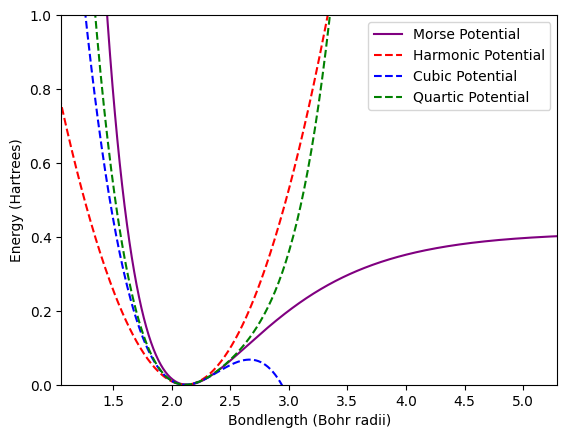

In [21]:
#Build a quartic potential model for CO using coefficients k,g,h derived from the previous step.
#Plot the Harmonic, Cubic, Quartic components along with the raw CCSD/cc-pVTZ data and the original Morse potential.
from matplotlib import pyplot as plt
# Harmonic potential
V_H = 1/2 * k_num_1 * (r -r_eq_au_1) ** 2

# cubic
V_C = V_H + 1/6 * g_num_1 * (r - r_eq_au_1) ** 3

# quartic
V_Q = V_C + 1/24 * h_num_1 * (r - r_eq_au_1) ** 4

plt.plot(r, V_Morse, 'purple', label="Morse Potential")
plt.plot(r, V_H, 'r--', label="Harmonic Potential")
plt.plot(r, V_C, 'b--', label="Cubic Potential")
plt.plot(r, V_Q, 'g--', label="Quartic Potential")
plt.xlim(0.5 * r_eq_au_1, 2.5 * r_eq_au_1)
plt.ylim(0, 1)
plt.xlabel("Bondlength (Bohr radii)")
plt.ylabel("Energy (Hartrees)")
plt.legend()
plt.show()



2282.6783926580974
2253.9022030839405
2.530012302112027e-15
5.498588537745715
2282.6783926580974
2288.1769811958434
2271.6538579187572
2277.080368191201


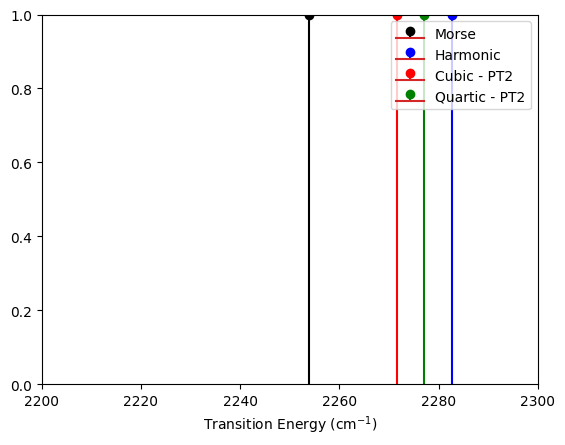

In [22]:
#Compute the fundamental transition energy from CO using the quartic potential and 2nd-order perturbation theory.
#Make a table that includes the fundamental computed using this approximation, the fundamental from the Morse model, and the experimental value for the CO fundamental.
#Include a column for the percentage error of both approximations relative to the experimental value.
au_to_wn = 219474.63068

# fundamental transition energy at HO level
fundamental_HO = harmonic_eigenvalue(1, k_num_1, mu_au, hbar_au) - harmonic_eigenvalue(0, k_num_1, mu_au, hbar_au)
V_approx_H = print(fundamental_HO * au_to_wn)

# fundamental transition energy at Morse level
fundamental_Morse = morse_eigenvalue(1, k_num_1, mu_au, De_au, hbar_au) - morse_eigenvalue(0, k_num_1, mu_au, De_au, hbar_au)
V_approx_M = print(fundamental_Morse * au_to_wn)

# 1st order correction using the cubic potential
pt1_cubic = potential_matrix_element(0, 0, alpha, r, r_eq_au_1, (V_C - V_H))
print(pt1_cubic * au_to_wn)

# 1st order correction using the quartic potential
pt1_quartic = potential_matrix_element(0, 0, alpha, r, r_eq_au_1, (V_Q - V_H))
print(pt1_quartic * au_to_wn)

# 2nd order corrections using cubic and quartic potentials
pt2_cubic = 0
pt2_quartic = 0

# sum over |<j|V'|n>|^2/(Ej-En)
for j in range(1, 50):
    E_j = harmonic_eigenvalue(j, k, mu_au, hbar_au)
    Vc_j0 = potential_matrix_element(j, 0, alpha, r, r_eq_au_1, (V_C - V_H))
    pt2_cubic += Vc_j0 ** 2 / (fundamental_HO - E_j)
    Vq_j0 = potential_matrix_element(j, 0, alpha, r, r_eq_au_1, (V_Q - V_H))
    pt2_quartic += Vq_j0 ** 2 / (fundamental_HO - E_j)

import matplotlib.pyplot as plt

cubic_fo = fundamental_HO + pt1_cubic
quartic_fo = fundamental_HO + pt1_quartic
print(cubic_fo * au_to_wn)
print(quartic_fo * au_to_wn)


cubic_so = cubic_fo + pt2_cubic
quartic_so = quartic_fo + pt2_quartic
print(cubic_so * au_to_wn)
print(quartic_so * au_to_wn)

au_to_wn = 219474.63068

morse_plot = np.array([fundamental_Morse * au_to_wn, 1.0])
HO_plot = np.array([fundamental_HO * au_to_wn, 1.0])
cubic_so_plot = np.array([cubic_so * au_to_wn, 1.0])
quartic_so_plot = np.array([quartic_so * au_to_wn, 1.0])






plt.stem(morse_plot[0], morse_plot[1], "black", label="Morse")
plt.stem(HO_plot[0], HO_plot[1], "blue", label="Harmonic")
plt.stem(cubic_so_plot[0], cubic_so_plot[1], "red", label="Cubic - PT2")
plt.stem(quartic_so_plot[0], quartic_so_plot[1], "green", label="Quartic - PT2")
plt.xlim(2200, 2300)
plt.ylim(0, 1)
plt.xlabel("Transition Energy (cm$^{-1}$)")
plt.legend()
plt.show()





In [23]:
#experimental value and error
V_ex = 2143.23
Error_Vex_Vquart = ((quartic_so * au_to_wn) - V_ex) / V_ex
Percent_Error_Vex_Vquart = Error_Vex_Vquart *100
print(Error_Vex_Vquart, Percent_Error_Vex_Vquart)

0.062452638396812823 6.245263839681282
